In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.optimizers import Adadelta
from keras.backend import get_session
from keras import backend as K

In [44]:
# For finger
finger_path = '/home/hihipch/finger/fingers/train'
finger_list = []
for (path, dir, files) in os.walk(finger_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.png':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            finger_list.append(filePath)

In [45]:
len(finger_list)

18000

In [46]:
R0_list=[]
R1_list=[]
R2_list=[]
R3_list=[]
R4_list=[]
R5_list=[]
L0_list=[]
L1_list=[]
L2_list=[]
L3_list=[]
L4_list=[]
L5_list=[]
for i in finger_list:
    if i[-6]+i[-5]=='0R':
        R0_list.append(i)
    if i[-6]+i[-5]=='1R':
        R1_list.append(i)
    if i[-6]+i[-5]=='2R':
        R2_list.append(i)
    if i[-6]+i[-5]=='3R':
        R3_list.append(i)
    if i[-6]+i[-5]=='4R':
        R4_list.append(i)
    if i[-6]+i[-5]=='5R':
        R5_list.append(i)
    if i[-6]+i[-5]=='0L':
        L0_list.append(i)
    if i[-6]+i[-5]=='1L':
        L1_list.append(i)
    if i[-6]+i[-5]=='2L':
        L2_list.append(i)
    if i[-6]+i[-5]=='3L':
        L3_list.append(i)
    if i[-6]+i[-5]=='4L':
        L4_list.append(i)
    if i[-6]+i[-5]=='5L':
        L5_list.append(i)

In [47]:
R0_list=R0_list[:150]
R1_list=R1_list[:150]
R2_list=R2_list[:150]
R3_list=R3_list[:150]
R4_list=R4_list[:150]
R5_list=R5_list[:150]
L0_list=L0_list[:150]
L1_list=L1_list[:150]
L2_list=L2_list[:150]
L3_list=L3_list[:150]
L4_list=L4_list[:150]
L5_list=L5_list[:150]

print(len(R0_list))
print(len(R1_list))
print(len(R2_list))
print(len(R3_list))
print(len(R4_list))
print(len(R5_list))
print(len(L0_list))
print(len(L1_list))
print(len(L2_list))
print(len(L3_list))
print(len(L4_list))
print(len(L5_list))

150
150
150
150
150
150
150
150
150
150
150
150


In [52]:
# Create Data Frame
# R0_list = 0
# R1_list = 1
# R2_list = 2
# R3_list = 3
# R4_list = 4
# R5_list = 5
# L0_list = 6
# L1_list = 7
# L2_list = 8
# L3_list = 9
# L4_list = 10
# L5_list = 11

R0_df = pd.DataFrame(data={'filename': R0_list, 'label': [0 for i in range(len(R0_list))]})
R1_df = pd.DataFrame(data={'filename': R1_list, 'label': [1 for i in range(len(R1_list))]})
R2_df = pd.DataFrame(data={'filename': R2_list, 'label': [2 for i in range(len(R2_list))]})
R3_df = pd.DataFrame(data={'filename': R3_list, 'label': [3 for i in range(len(R3_list))]})
R4_df = pd.DataFrame(data={'filename': R4_list, 'label': [4 for i in range(len(R4_list))]})
R5_df = pd.DataFrame(data={'filename': R5_list, 'label': [5 for i in range(len(R5_list))]})
L0_df = pd.DataFrame(data={'filename': L0_list, 'label': [6 for i in range(len(L0_list))]})
L1_df = pd.DataFrame(data={'filename': L1_list, 'label': [7 for i in range(len(L1_list))]})
L2_df = pd.DataFrame(data={'filename': L2_list, 'label': [8 for i in range(len(L2_list))]})
L3_df = pd.DataFrame(data={'filename': L3_list, 'label': [9 for i in range(len(L3_list))]})
L4_df = pd.DataFrame(data={'filename': L4_list, 'label': [10 for i in range(len(L4_list))]})
L5_df = pd.DataFrame(data={'filename': L5_list, 'label': [11 for i in range(len(L5_list))]})

finger_df=R0_df.append([R1_df, R2_df, R3_df, R4_df, R5_df, L0_df, L1_df, L2_df, L3_df, L4_df, L5_df])
finger_df.columns=['filename', 'label']
finger_df=finger_df.sample(frac=1)
finger_df.reset_index(drop=True,inplace=True)

In [53]:
y_train = np.array(finger_df['label'].tolist())
y_train = keras.utils.np_utils.to_categorical(y_train)

In [54]:
import imageio

### Resizing DICOM files in the df
x_train=[]
for i in finger_df['filename']:
    pixeldata = imageio.imread(i)
    mean, std = pixeldata.mean(), pixeldata.std()
    pixeldata = (np.clip((pixeldata-mean)/std, -2.0, 2.0)+2.0)/4.0
    x_train.append(pixeldata)
x_train=np.array(x_train).reshape(1800, 128, 128, 1).astype('float32')

In [55]:
x_val=x_train[1200:1500]
y_val=y_train[1200:1500]
x_test=x_train[1500:]
y_test=y_train[1500:]

In [56]:
x_train=x_train[:1200]
y_train=y_train[:1200]

In [57]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))
print(len(x_test))
print(len(y_test))

1200
1200
300
300
300
300


In [62]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(128, 128, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(8, (8, 8), activation='tanh', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (8, 8), activation='tanh', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (8, 8), activation='tanh', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (8, 8), activation='tanh', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (8, 8), activation='tanh', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (8, 8), activation='tanh', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (8, 8), activation='tanh', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (8, 8), activation='tanh', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (8, 8), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
opt = tf.keras.optimizers.Adam(clipnorm=1.0)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 128, 128, 8)       520       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 16)        8208      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 16)        16400     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 16)        0   

In [63]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=32,
                validation_data=(x_val, x_val))

Train on 1200 samples, validate on 300 samples
Epoch 1/200
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6556 - val_loss: 0.6405
Epoch 2/200
1200/1200 [==============================] - 1s 856us/step - loss: 0.6374 - val_loss: 0.6348
Epoch 3/200
1200/1200 [==============================] - 1s 857us/step - loss: 0.6340 - val_loss: 0.6318
Epoch 4/200
1200/1200 [==============================] - 1s 851us/step - loss: 0.6310 - val_loss: 0.6290
Epoch 5/200
1200/1200 [==============================] - 1s 856us/step - loss: 0.6280 - val_loss: 0.6265
Epoch 6/200
1200/1200 [==============================] - 1s 851us/step - loss: 0.6255 - val_loss: 0.6239
Epoch 7/200
1200/1200 [==============================] - 1s 856us/step - loss: 0.6233 - val_loss: 0.6225
Epoch 8/200
1200/1200 [==============================] - 1s 853us/step - loss: 0.6219 - val_loss: 0.6207
Epoch 9/200
1200/1200 [==============================] - 1s 856us/step - loss: 0.6204 - val_loss: 0.6195
Epoch 10/2

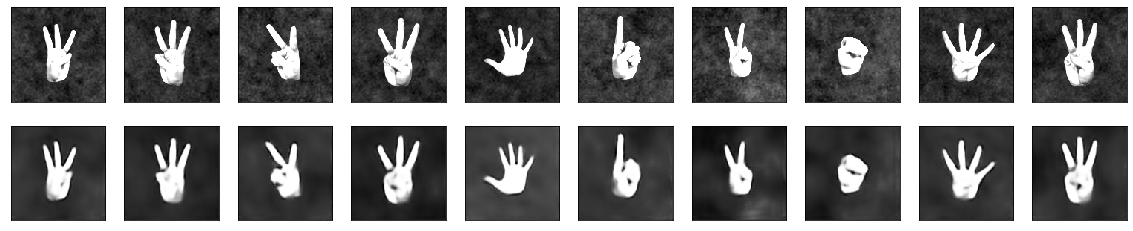

In [64]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [68]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
encoded_numbers=encoded_imgs.reshape(300, 512)

In [69]:
from sklearn.manifold import TSNE
np.random.seed(1)
encoded_numbers_result = TSNE(learning_rate=300, init='pca').fit_transform(encoded_numbers)

In [70]:
df_encoded_numbers_result = (
  pd.DataFrame(encoded_numbers_result, columns=['V1', 'V2'])
)

In [81]:
test_label_df=pd.DataFrame(np.argmax(y_test, axis=1), columns=['label'])
answer=pd.concat([df_encoded_numbers_result, test_label_df], axis=1)

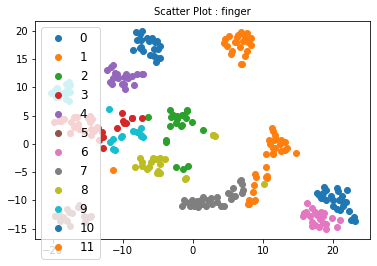

<Figure size 72x72 with 0 Axes>

In [83]:
groups = answer.groupby('label')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.V1, group.V2, marker='o', linestyle='', label=name)

ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot : finger', fontsize=10)
plt.figure(figsize=(1, 1))
plt.show()

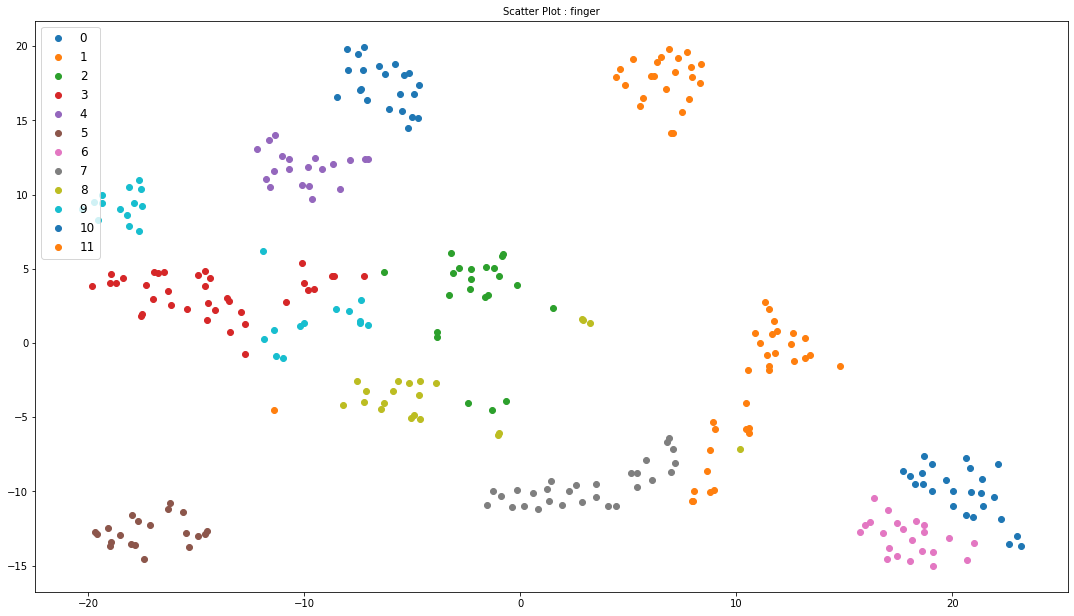

In [84]:
groups = answer.groupby('label')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.V1, group.V2, marker='o', linestyle='', label=name)

ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot : finger', fontsize=10)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()